<a href="https://colab.research.google.com/github/ClarisseAlvarenga/data_science_alura_cursos/blob/master/Sci_Kit_Learn_curso_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCI-KIT LEARN - CURSO ALURA

In [82]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm


## PROBLEMAS DE REGRESSÃO

In [83]:
#buscando os dados
passageiros = pd.read_csv('Passageiros.csv')

In [84]:
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


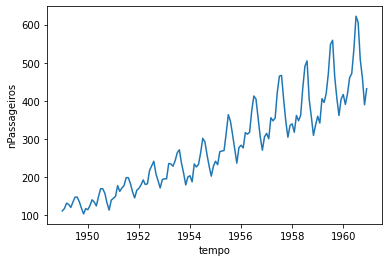

In [85]:
ax = sns.lineplot(x='tempo', y='nPassageiros', data=passageiros)

### Regressão Linear

In [86]:
#separando as variáveis
Tempo = passageiros.iloc[:,:-1].values

In [87]:
nPassageiros = passageiros.iloc[:,1].values

In [88]:
#importando o módulo para dividir o dataframe entre dados de teste e de treino
from sklearn.model_selection import train_test_split

In [89]:
#gerando os dados de treino e teste
Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, test_size =0.3)

In [90]:
#importando o móludo para nossa Regressão
from sklearn.linear_model import LinearRegression

In [91]:
#gerando o regressor
regressor = LinearRegression()

In [92]:
#criando ajustando os dados ao modelo
regressor.fit(Tempo_treino, nPassageiros_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
#fazendo previsões
nPassageiros_predito = regressor.predict(Tempo_teste)

In [94]:
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste), 'nPassageiros': nPassageiros_predito})

In [95]:
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste), 'nPassageiros': nPassageiros_teste})

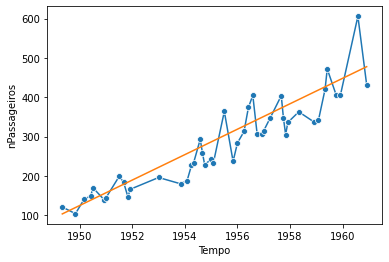

In [96]:
#plotando os dados reais e as predições da regressão
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_teste, marker = 'o')
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito)

#### Conferindo o coeficiente angular e o coeficiente linear da Regressão

Com estes dois pontos podemos calcular a regressão manualmente

Cálculo: 

### **y = ax + b**

y = o valor a ser previsto

a = coeficiente angular

x = variável explicativa

b = coeficiente linear

In [97]:
#coeficiente angular
regressor.coef_

array([32.31749428])

In [98]:
#coeficiente linear
regressor.intercept_

-62894.15930534471

#### O cálculo acima coloca os pontos numa reta, mas a predição tem um erro que é calculado como 

### **e1 = y1 - y**

sendo que o y1 é o valor real e o y o valor previsto

o R2 é o coeficiente de determinação, que explica quão bem ajustada está a reta aos dados.

In [99]:
#importando das métricas do sklearn o r2_score
from sklearn.metrics import r2_score

In [100]:
#este resultado diz que a reta está bem ajustada aos dados, apesar da sazonalidade (quanto mais próximo de 1, melhor)
r2_score(nPassageiros_teste, nPassageiros_predito)

0.8187937794271518

### Máquinas de vetores de suporte

Elas trabalham com uma reta de hiperplano, mas também temos duas retas de borda, com uma área definida entre elas. Dentro, os pontos são chamados de vetores de suporte. Elas estão a uma distância mais ou menos E da reta de hiperplano. Assim, nossa reta é definida por essa equação. Somando ou subtraindo o valor E conseguimos definir a reta de borda.

Isso é usado para resolver planos lineares. Porém, os pontos de vetores de suporte nos ajudam a passar para outro domínio, porque estamos trabalhando com um problema não linear, e queremos remapear os dados para um domínio em que enxergamos o problema de forma linear.

A função que vamos usar pega um dado em um domínio com poucas dimensões e passa para um domínio com mais dimensões, em que consigamos trabalhar de forma linear. Podemos começar a trabalhar com as SVMs.



In [101]:
from sklearn.svm import SVR

In [102]:
#usando os parâmetros padrão
regressor_svr = SVR()

In [103]:
#alterando atributos
#C reduz ruídos
regressor_svr = SVR(C=10000000)

In [104]:
#ajuste dos dados de teste
regressor_svr.fit(Tempo_treino, nPassageiros_treino)

SVR(C=10000000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [105]:
nPassageiros_predito_svr = regressor_svr.predict(Tempo_teste)

In [106]:
passageiros_teste_svr = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste), 'nPassageiros': nPassageiros_teste})
passageiros_predito_svr = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste), 'nPassageiros': nPassageiros_predito_svr})

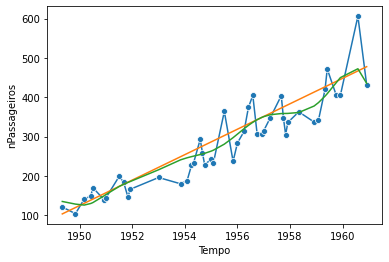

In [107]:
#plotando os dados reais e as predições da regressão
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_teste_svr, marker = 'o')
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito)
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito_svr)

In [108]:
r2_score(nPassageiros_teste, nPassageiros_predito_svr)

0.8584734993236788

## PROBLEMAS DE CLASSIFICAÇÃO

In [112]:
celular = pd.read_csv('Celular.csv', delimiter=",")

In [113]:
celular.head()

,salario,economias,idade,dividas,plano
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


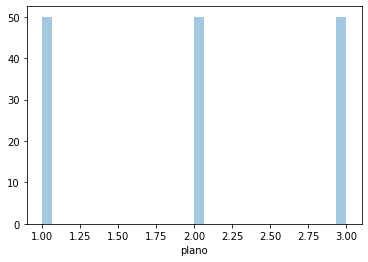

In [116]:
ax = sns.distplot(celular["plano"], bins=30, kde=False)

### Árvores de Decisão

In [117]:
#variáveis explicativas
x = celular.iloc[:,:-1].values

In [118]:
#variável dependente
y = celular.iloc[:,4].values

In [119]:
#criando as bases de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3)

In [130]:
from sklearn import tree

In [131]:
#criando o modelo
classificador_arvore = tree.DecisionTreeClassifier()

In [132]:
#ajustando os dados ao modelo
classificador_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [133]:
import graphviz

In [134]:
#criando uma visualização para a árvore de decisão
dot_data = tree.export_graphviz(classificador_arvore, filled=True, out_file=None)

In [135]:
grafico = graphviz.Source(dot_data)

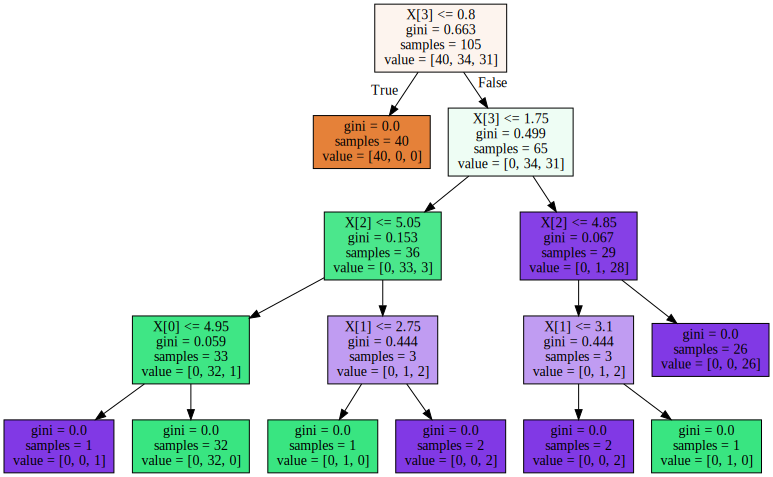

In [136]:
#plotando a árvore de decisão
grafico

In [137]:
#prevendo o plano de celular conforme as variáveis explicativas
plano_previsto = classificador_arvore.predict(x_teste)

In [138]:
#visualizando as previsões
plano_previsto

array([2, 2, 3, 2, 3, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 1, 1, 2, 2, 2, 3,
       2, 2, 3, 1, 1, 2, 3, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 3, 2, 1, 3, 2,
       2])

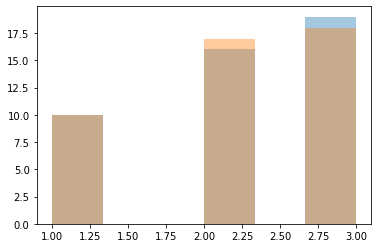

In [145]:
sns.distplot(y_teste, bins=6, kde=False)
sns.distplot(plano_previsto, bins=6, kde=False)

In [143]:
from sklearn.metrics import accuracy_score

In [144]:
#vendo quanto o classificador acertou usando medidas de acurácia
accuracy_score(y_teste, plano_previsto)*100

93.33333333333333

### K vizinhos mais próximos

K não pode ser igual ao número de classes ou múltiplo dos números de classe

In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
classificador_vizinho = KNeighborsClassifier(5)

In [148]:
classificador_vizinho.fit(x_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [150]:
plano_previsto_v =  classificador_vizinho.predict(x_teste)

In [151]:
plano_previsto_v

array([2, 2, 3, 2, 3, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 1, 1, 2, 2, 3, 3,
       2, 2, 2, 1, 1, 2, 3, 3, 2, 1, 3, 3, 3, 3, 1, 3, 1, 3, 2, 1, 3, 2,
       2])

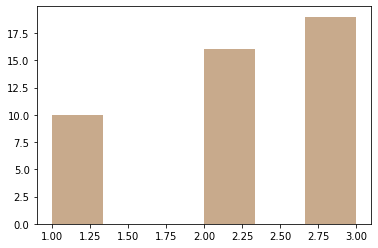

In [152]:
sns.distplot(y_teste, bins=6, kde=False)
sns.distplot(plano_previsto_v, bins=6, kde=False)

In [153]:
accuracy_score(y_teste, plano_previsto_v)*100

100.0

In [154]:
#usando uma nova forma de dividir os dados de teste e de treino
from sklearn.model_selection import RepeatedStratifiedKFold


In [155]:
skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

In [156]:
#para percorrer as repetições (Cross Validation)
from sklearn.model_selection import GridSearchCV

In [162]:
params = {'n_neighbors':[5]}

In [163]:
#incluindo os parâmetros e as repetições
gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv=skfold, verbose=1, scoring="accuracy", return_train_score=True)

In [164]:
#ajustando o modelo aos dados
gs.fit(x,y)

Fitting 100 folds for each of 1 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=0),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None, param_grid={'n_neighbors': [5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [167]:
#verificando a acurácia do teste
gs.cv_results_['mean_test_score']

array([0.964])

## PROBLEMAS DE AGRUPAMENTO

In [169]:
engajamento = pd.read_csv('Engajamento.csv')

In [170]:
engajamento.head()

,Horas,Taxa de Cliques,Classe
0,1007.084589,1.582099,1
1,1005.886193,1.524809,1
2,1005.609471,0.846857,1
3,989.814354,2.841944,2
4,995.328807,3.569900,3


In [171]:
#em problemas de clustering não há um alvo
x = engajamento.iloc[:,:-1]
x

,Horas,Taxa de Cliques
0,1007.084589,1.582099
1,1005.886193,1.524809
2,1005.609471,0.846857
3,989.814354,2.841944
4,995.328807,3.569900
...,...,...
4995,991.447007,5.428443
4996,996.841049,15.504041
4997,991.723479,4.750185
4998,996.695706,14.807956


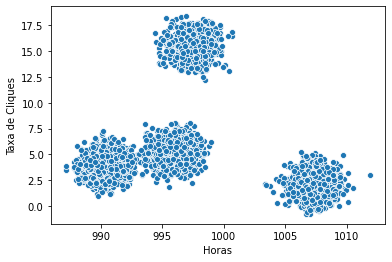

In [172]:
#visualizando a base de dados
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=x)

### KMeans

In [173]:
from sklearn.cluster import KMeans

In [174]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [175]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [176]:
#visualizando resultado
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

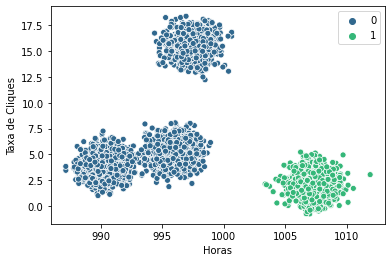

In [178]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=x, hue=kmeans.labels_, palette='viridis')

In [180]:
#fazendo 4 grupos
kmeans = KMeans(n_clusters=4, random_state=0)

In [181]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

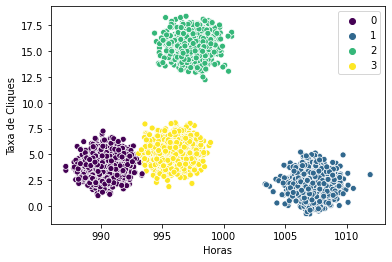

In [182]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=x, hue=kmeans.labels_, palette='viridis')

### OPTICS

In [184]:
#ao invés de informar os grupos, informo o mínimo por grupo
from sklearn.cluster import OPTICS

In [189]:
clustering_o = OPTICS(min_samples=800).fit(x)

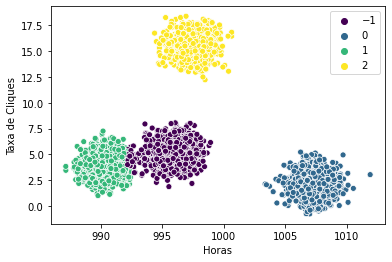

In [190]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=x, hue=clustering_o.labels_, palette='viridis')

### Métodos de Avaliação

In [192]:
#Quando conhecemos as classes
from sklearn.metrics import adjusted_rand_score

In [193]:
classe_conhecida = engajamento['Classe']

In [194]:
classe_estimada = clustering_o.labels_

In [195]:
adjusted_rand_score(classe_conhecida, classe_estimada)

0.9821047486293407

In [196]:
classe_estimada_k = kmeans.labels_

In [197]:
adjusted_rand_score(classe_conhecida, classe_estimada_k)

0.9957444328155858

In [201]:
#Quando não conhecemos os grupos temos uma medida para conferir quão bem definidos estão os grupos. Esta função retorna valores entre -1 e 1, quanto mais próximo de 1, melhor
from sklearn.metrics import silhouette_score


In [202]:
silhouette_score(x,kmeans.labels_, metric='euclidean')

0.7640009351490763

In [203]:
silhouette_score(x,clustering_o.labels_, metric='euclidean')

0.7590075270703337